# Data Science e Machine Learning na Prática - Introdução e Aplicações na Indústria de Processos

### Notebook 3 - Passo a passo de um projeto de classificação

por [Afrânio](http://afrjr.weebly.com) - [afraeq@gmail.com](mailto:afraeq@gmail.com)

[Escola Piloto Prof. Giulio Massarani](http://www.escolapiloto.peq.coppe.ufrj.br/) - [Programa de Engenharia Química, COPPE, UFRJ](http://portal.peq.coppe.ufrj.br/) - 2019

Neste [notebook](http://jupyter.org/), o estudo mais aprofundado do problema de classificação é realizado utilizando os conjuntos de dados [MNIST](https://en.wikipedia.org/wiki/MNIST_database) e [Breast Cancer Wiscosin Diagnositcs](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). 

Conceitos importantes a aprender:

* separação dos conjuntos de treino e teste;
* validação cruzada;
* métricas de desempenho;
* matriz de confusão;
* precisão *x* revocação;
* acurácia simples;
* classificação binária *x* multiclasse;
* padronização dos dados.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### O conjunto de dados MNIST

* O conjunto de dados MNIST, um dos mais famosos da área de machine learning, é composto por 70000 imagens de dígitos de 0 a 9 desenhados por estudantes de ensino médio e funcionários do US Census Bureau. 

* Cada imagem vem acompanhada de seu rótulo, ou seja, o dígito que ela contém. 

* Nossa tarefa neste notebook será aplicar algoritmos de classificação que analisem uma imagem e predigam o algarismo correspondente.

### Importação dos dados

O próprio scikit-learn dispõe de funções que permitem obter conjuntos de dados populares. A função [fetch_mldata](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_mldata.html), por exemplo, possibilita o download de dados contidos no site http://mldata.org/.

Abaixo, essa função é usada para baixar os dados do conjunto MNIST:

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

O objeto **mnist** é um dicionário contendo:

* uma chave **DESCR** descrevendo o conjunto de dados;
* uma chave **key** contendo uma array com uma coluna por atributo e uma linha por observação;
* uma chave **target** contendo uma array com os rótulos de cada observação.

In [3]:
mnist['DESCR']

'mldata.org dataset: mnist-original'

In [4]:
mnist['data'].shape

(70000, 784)

In [5]:
mnist['target'].shape

(70000,)

Percebe-se que:

* Há 70000 imagens e 784 atributos para cada imagem. 
* Cada imagem é composta por uma matriz de 28x28 pixels. Os 784 atributos, portanto, correspondem a cada um desses pixels.

Dando nomes mais amigáveis aos dados:

In [6]:
X, y = mnist["data"], mnist["target"]

Vamos dar uma olhada em algumas imagens usando o Matplotlib:

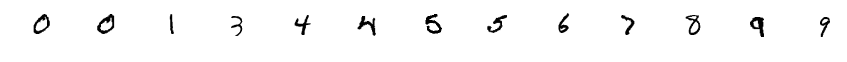

In [7]:
# localização dos exemplos na matriz de dados 
loc = [0,1,11200,23000,29000,30000,32000,36000,39000,42000,50300,55000,55010]

# selecionando os dígitos, já no formato de matriz
digitos = [X[i].reshape(28,28) for i in loc]

# criando figura do matplotlib
fig, ax = plt.subplots(1,len(loc),figsize=(15,0.5))

# plotando!
[ax[i].imshow(digitos[i], cmap = matplotlib.cm.binary, interpolation="nearest") for i in range(len(loc))]

# desligando os eixos de todos os dígitos
[ax[i].axis('off') for i in range(len(loc))];

### Separação em conjunto de treino e conjunto de teste:

Abaixo, geramos dois conjuntos separados, **dados_treino** e **dados_teste**, utilizando a função **train_test_split**:

In [8]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.1, random_state=0)

In [9]:
X_treino.shape

(63000, 784)

In [10]:
X_teste.shape

(7000, 784)

É importante ressaltar que a função **train_test_split** embaralha os dados, de modo a tirar qualquer tipo de influência do ordenamento dos dados nas etapas subsequentes.

### Construindo identificadores de cincos

Vamos começar construindo classificadores binários, que identifiquem se uma imagem contém ou não o número 5. 

O classificador é dito binário porque ele identifica uma imagem como pertencente à uma das duas classes: a classe positiva (a imagem é um 5) ou à classe negativa (a imagem não é um 5). 

Para tal, precisamos criar um vetor de rótulos binário:

In [11]:
y_treino_5 = (y_treino == 5) # True para todos os 5, false para os demais números
y_teste_5 = (y_teste == 5)

Criaremos três classificadores, utilizando os métodos **LinearSVC** (estudado no notebook anterior), **DecisionTreeClassifier** e o **SGDClassifier** (ainda não estudados no curso):

In [12]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier 

linear_svc = LinearSVC(random_state=0)
tree_clf = DecisionTreeClassifier(random_state=0)
sgd_clf = SGDClassifier(random_state=0)

Treinando os classificadores:

In [13]:
%%time
linear_svc.fit(X_treino, y_treino_5)

CPU times: user 31.9 s, sys: 423 ms, total: 32.3 s
Wall time: 32.6 s


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [14]:
%%time
tree_clf.fit(X_treino, y_treino_5)

CPU times: user 34.4 s, sys: 469 ms, total: 34.9 s
Wall time: 36.3 s


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [15]:
%%time
sgd_clf.fit(X_treino, y_treino_5)

CPU times: user 570 ms, sys: 163 ms, total: 734 ms
Wall time: 739 ms


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)

Pronto! Temos três classificador treinados, guardados nos objetos **linear_svc**, **tree_clf** e **sgd_clf**. 

Esses classificadores podem ser então usados para predizer se uma dada imagem é ou não um número 5. Para isso, basta fornecer a imagem à função **predict** (presente nos três objetos):

In [16]:
sgd_clf.predict([X[36000]])

array([ True])

In [17]:
tree_clf.predict([X[36000]])

array([ True])

In [18]:
linear_svc.predict([X[36000]])

array([ True])

Todos os classificadores são unânimes em afirmar que a imagem **X[36000]** representa o número 5. Checando seu rótulo para confirmar:

In [19]:
y[36000]

5.0

Ahá! De fato! Nossos classificadores acertaram! 

Mas será que eles acertam também nas outras imagens? Como checar e comparar o desempenho desses classificadores de forma ampla e prática? 

Para isso, podemos utilizar a [estratégia de validação cruzada](https://pt.wikipedia.org/wiki/Valida%C3%A7%C3%A3o_cruzada) e métricas de avaliação, como [matriz de confusão](https://en.wikipedia.org/wiki/Confusion_matrix) ou [precisão e revocação](https://pt.wikipedia.org/wiki/Precis%C3%A3o_e_revoca%C3%A7%C3%A3o).

### Validação cruzada e métricas de avaliação

Existem diversos tipos de validação cruzada. Aqui será descrita a validação *K-fold*, que segue as etapas:

* **1)** divide-se aleatoriamente o conjunto de treinamento em $K$ conjuntos mutuamente exclusivos e do mesmo tamanho;
* **2)** realizam-se K treinamentos, selecionando-se em cada um desses treinamentos os dados de $K-1$ conjuntos. O conjunto restante serve para avaliação.

Perceba que o conjunto de teste preparado no começo da aula permanece intacto (a validação cruzada é feita toda no conjunto de treinamento). É de fato uma boa prática que esse conjunto de teste só seja usado no final do desenvolvimento dos modelos, como uma espécie de "prova final".

A função **cross_val_predict** realiza a validação cruzada *K-fold* nos nossos classificadores, com divisão do conjunto em $K=3$:

In [20]:
from sklearn.model_selection import cross_val_predict

y_treino_pred_svc = cross_val_predict(linear_svc, X_treino, y_treino_5, cv=3)
y_treino_pred_tree = cross_val_predict(tree_clf, X_treino, y_treino_5, cv=3)
y_treino_pred_sgd = cross_val_predict(sgd_clf, X_treino, y_treino_5, cv=3)

Os objetos **y_treino_pred** contém as predições feitas para cada ponto do conjunto.

Podemos avaliar a qualidade dessas predições usando *matrizes de confusão*:

In [21]:
from sklearn.metrics import confusion_matrix

Classificador SVC:

In [22]:
confusion_matrix(y_treino_5, y_treino_pred_svc)

array([[53132,  4206],
       [ 1323,  4339]])

Classificador Decision Tree:

In [23]:
confusion_matrix(y_treino_5, y_treino_pred_tree)

array([[56424,   914],
       [  829,  4833]])

Classificador SGD:

In [24]:
confusion_matrix(y_treino_5, y_treino_pred_sgd)

array([[56274,  1064],
       [ 1233,  4429]])

A primeira linha de cada matriz corresponde à classe negativa (não-5's) e a segunda, à classe positiva (5's). Os elementos da diagonal correspondem às previsões certas, e os demais, às previsões erradas.

Note que o melhor resultado, de longe, é o da *Decision Tree*. Mas também devemos ficar atentos ao desempenho computacional: o SGD é bem mais eficaz do que os demais.

Para uma métrica mais concisa, podemos usar os conceitos de precisão $P$ e revocação $R$:

$$
P = \frac{VP}{VP+FP}
$$

$$
R = \frac{VP}{VP+FN}
$$

em que $VP$ é o número de verdadeiros positivos, $FP$ é o número de falsos positivos e $FN$ é o número de falsos negativos. Em suma:

* A precisão diz respeito à proporção de positivos detectados que está correta.
* A revocação diz respeito à proporção de positivos que são corretamente detectados.

Na prática:

In [25]:
from sklearn.metrics import precision_score, recall_score

Para a Decision Tree, que obteve melhor desempenho:

In [26]:
precision_score(y_treino_5, y_treino_pred_tree)

0.8409605011310248

In [27]:
recall_score(y_treino_5, y_treino_pred_tree)

0.8535853055457435

Ou seja: 

* quando o classificador indica que a imagem é um 5, ele está correto 84% das vezes;
* o classificador detecta 85% dos 5's.

A precisão é uma medida de exatidão das detecções e tem a ver com qualidade; a revocação é uma medida de completude  das detecções e tem a ver com quantidade.

Para um mesmo problema e método, quanto maior a precisão, menor a revocação, e vice-versa. Esse fenômeno é conhecido como o compromisso entre precisão/revocação (*precision/recall tradeoff*).

### Construindo identificadores multiclasse

Nosso objetivo até agora foi, dada uma imagem, identificar se ela continha ou não o dígito 5. Neste ponto, queremos identificar, dada uma imagem, qual dos dez algarismos ela contém! 

Para isso, fornecemos ao método **fit** o vetor **y_treino** (que contém os rótulos completos), ao invés do **y_treino_5**: 

In [28]:
%%time
sgd_clf.fit(X_treino, y_treino)

CPU times: user 3.75 s, sys: 171 ms, total: 3.92 s
Wall time: 3.93 s


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)

Usamos o classificador SGD porque ele apresentou maior eficiência computacional no problema mais simples.

Classificando uma imagem:

In [29]:
sgd_clf.predict([X[36000]])

array([5.])

Na mosca!

Avaliando o desempenho com validação cruzada:

In [30]:
y_treino_pred_sgd = cross_val_predict(sgd_clf, X_treino, y_treino, cv=3)
conf_mx = confusion_matrix(y_treino, y_treino_pred_sgd)
conf_mx

array([[5997,    2,   63,   60,   14,   25,   26,    7,   42,    7],
       [   3, 6530,   66,  211,   13,   31,   28,   16,  181,   19],
       [  59,   47, 5471,  224,   84,   34,   55,   82,  228,   18],
       [  24,   25,  151, 5882,   12,  106,   13,   56,   86,   53],
       [  26,   23,   75,   49, 5761,   12,   24,   34,   53,  127],
       [  88,   30,   84,  737,  152, 4171,  104,   23,  190,   83],
       [  86,   35,  199,   42,   69,  101, 5540,   10,   52,    4],
       [  33,   27,   94,  141,   91,   21,    4, 5905,   49,  204],
       [  70,  153,  161,  671,  124,  541,   44,   55, 4227,  107],
       [  39,   41,   35,  274,  606,  157,    0,  454,   72, 4565]])

Os maiores valores encontram-se na diagonal principal, o que é um bom sinal de desempenho!

Podemos visualizar melhor essa matriz plotando-a com o auxílio da função [matshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.matshow.html) da biblioteca Matplotlib:

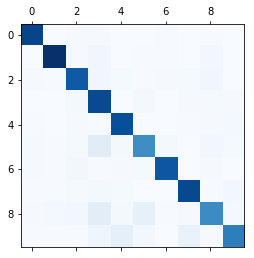

In [31]:
plt.matshow(conf_mx, cmap=plt.cm.Blues)
plt.show()

Para analisar melhor os erros, podemos dividir cada valor na matriz pelo número total de imagens em cada classe (de modo a termos uma medida da quantidade relativa, e não absoluta, de erros):

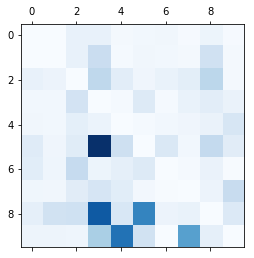

In [32]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# sumindo com a diagonal, pra podermos analizar só os erros:
np.fill_diagonal(norm_conf_mx, 0)

plt.matshow(norm_conf_mx, cmap=plt.cm.Blues)
plt.show()

A matriz de confusão nessa forma é bem informativa. Por exemplo: 

* a coluna do número 3 tem muitos pontos escuros, o que significa que muitas imagens são classificadas equivocadamente como 3. 

* a linha do número 8 também tem muitos pontos escuros, o que significa que o número 8 é frequentemente confundido com outros dígitos.

* o ponto mais escuro é o (5,3), o que significa que a maior fonte de erro é quando o dígito 5 é classificado como 3.

Outra maneira de avaliar o desempenho na validação cruzada é com a *acurácia simples* em cada conjunto K. Para isso, utilizamos a função **cross_val_score**:

In [33]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_treino, y_treino, cv=3, scoring="accuracy")

array([0.86144177, 0.84914286, 0.86317745])

Por volta de 85% de acerto! Nada mal. (Obs: você consegue pensar por que a acurácia simples não é uma boa representação para o exemplo de classificação binária anterior?)

Apesar disso, podemos melhorar ainda mais o desempenho do algoritmo por meio da *padronização dos dados* (subtração da média e divisão pelo desvio-padrão de cada coluna da matriz de dados). A padronização é aplicada a todo elemento $ij$ da matriz de dados usando a equação:

$$
x_{ij} = \displaystyle\frac{x_{ij} - \bar{x}_j}{\sigma_j}
$$

Após se efetuar a padronização, todas as colunas da matriz de dados passa a ter a mesma média (zero) e desvio-padrão (1). Isso faz com que efeitos de escala não interfiram no funcionamento dos algoritmos.

No scikit-learn, a padronização é realizada com a função **scale**:

In [34]:
from sklearn.preprocessing import scale
cross_val_score(sgd_clf, scale(X_treino), y_treino, cv=3, scoring="accuracy")

array([0.91148462, 0.90980952, 0.91351557])

Uau! Ultrapassamos 90% de acurácia. Isso ilustra a importância da padronização dos dados em uma etapa de pré-tratamento, antes do fornecimento a algoritmos de *machine-learning*.

É importante ressaltar que neste notebook não nos preocupamos em [escolher os melhores hiperparâmetros para cada modelo](https://scikit-learn.org/stable/modules/grid_search.html). Na prática, porém, é altamente recomendável que isso seja feito, de modo a proporcionar mais confiança de que os resultados correspondam ao melhor que cada modelo pode oferecer. 

### Treino e teste finais

O desenvolvimento de um sistema de Machine Learning costuma terminar com:

* um último treino, usando o melhor modelo e respectivos hiperparâmetros encontrados, e aplicado no conjunto de treino inteiro e...
* ...um último teste, aplicado no conjunto de testes separado lá no começo e que estava intacto até agora.

Um exemplo de como isso seria feito, no nosso caso:

Matriz de confusão:

[[640   1   3   1   2   2   5   2   4   0]
 [  0 741   6   4   1   5   1   0  18   3]
 [  2   4 615  16  11   1  14   7  18   0]
 [  0   7  18 648   0  25   3   5  17  10]
 [  3   1   2   0 597   1   6   2   6  22]
 [  6   5   7  23  12 537  16   3  29  13]
 [  3   4   5   0   3   5 714   0   4   0]
 [  3   1   8   2   5   1   1 673   1  29]
 [  2  19   8  18   3  14   3   2 592  11]
 [ 11   4   2  14  25  11   0  19   3 626]]


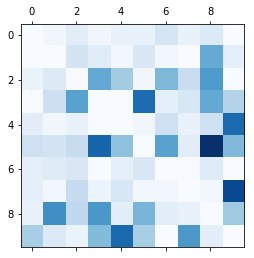

Acurácia simples: 0.9118571428571428


In [35]:
# instanciando modelo final
modelo_final = SGDClassifier(random_state=0)

# treinando modelo final
modelo_final.fit(scale(X_treino), y_treino)

# testando modelo final
y_teste_pred = modelo_final.predict(scale(X_teste))

# calculando métricas

# matriz de confusão
print('Matriz de confusão:\n')
conf_mx_teste = confusion_matrix(y_teste, y_teste_pred)
print(conf_mx_teste)
row_sums = conf_mx_teste.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx_teste / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.Blues)
plt.show()

# acurácia simples
from sklearn.metrics import accuracy_score
print('Acurácia simples:', accuracy_score(y_teste, y_teste_pred))

#### *Mão na massa! *

* Este mão na massa é quase todo por sua conta!
    * Pesquise sobre o conjunto de dados *Breast Cancer Wiscosin Diagnositcs*. Descubra como importá-lo dos conjuntos de dados disponíveis no scikit-learn.
    * Estude o conjunto de dados (imprima sua descrição, faça talvez alguns plots, etc). Fique à vontade para procurar exemplos na Internet (há vários) e utilizar diretamente, ou de forma adaptada, no seu código.
    * Identifique o problema de classificação a que o conjunto de dados se destina como exemplo.
    * Construa alguns modelos classificadores e realiza uma análise semelhante à que fizemos com o conjunto MNIST (validação cruzada, avaliação dos resultados com diferentes métricas, etc). Compare os resultados com e sem padronização dos dados.

### Bibliografia

* [Aurélien Géron - Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems - O'Reilly Media](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291/ref=sr_1_1?ie=UTF8&qid=1524694308&sr=8-1&keywords=hands-on+machine+learning)